In [1]:
from sklearn.datasets import make_blobs
import numpy as np

N_CENTERS = 3
N_POINTS  = 1000
N_DIMENSIONS = 2
M = 3
MAX_ITER = 100
EPSILON = 0.00001

In [2]:
%run functions.py

In [3]:
X, y = make_blobs(
    n_samples=N_POINTS,
    centers=N_CENTERS,
    n_features=N_DIMENSIONS,
    random_state=0,
    center_box=(0, 1.0),
    cluster_std = 0.02
)

In [4]:
centers = initialize_centers(X, n_centers=N_CENTERS)

mu = partition_matrix(X,centers, m=M)

J0 = objective(X, centers, m=M, mu=mu)

print("init:", J0)

for i in range(MAX_ITER):
    centers = update_centers(X, mu, m=3)

    mu = partition_matrix(X,centers, m=3)
    
    new_J = objective(X, centers, m=M, mu=mu)
    
    print(str(i),":",new_J)
    
    if J0 - new_J < EPSILON:
        J0 = new_J
        break
        
    J0 = new_J

init: 1.469318513030295
0 : 0.47118470041685845
1 : 0.39238778633650095
2 : 0.3863009868567112
3 : 0.3859021781545012
4 : 0.3858769767671356
5 : 0.38587538420780465


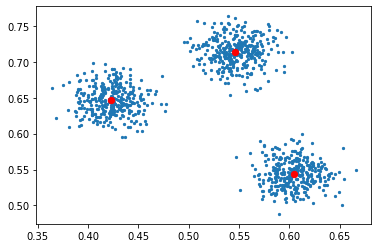

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], s=5, )
plt.scatter(centers[:,0],centers[:,1], s=40, c='red')

plt.show()

In [6]:
print(centers)

[[0.60451071 0.54391317]
 [0.42314308 0.6462491 ]
 [0.54628204 0.71426084]]


### Adicionando Novos Dados

In [7]:
n_new = 50
mean_ = [0.4, 0.5]
std_ = [0.02, 0.02]


X_new = np.array(
    [
        [mean_[i] + std_[i] * np.random.randn() for i in range(N_DIMENSIONS)]
        for j in range(n_new)
    ]
)

X_full = np.concatenate([X,X_new])

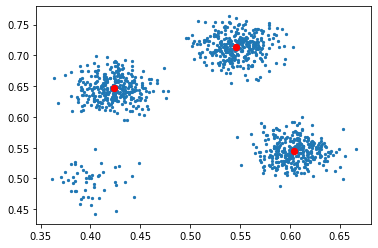

In [8]:
plt.scatter(X_full[:,0],X_full[:,1], s=5, )
plt.scatter(centers[:,0],centers[:,1], s=40, c='red')

plt.show()

In [9]:
new_centers = centers

new_mu = partition_matrix(X_full,new_centers, m=M)

J0 = objective(X_full, new_centers, m=M, mu=new_mu)

print("init:", J0)

for i in range(MAX_ITER):
    new_centers = update_centers(X_full, new_mu, m=3)

    new_mu = partition_matrix(X_full,new_centers, m=3)
    
    new_J = objective(X_full, new_centers, m=M, mu=new_mu)
    
    print(str(i),":",new_J)
    
    if J0 - new_J < EPSILON:
        J0 = new_J
        break
        
    J0 = new_J

init: 0.6080004845788249
0 : 0.6040187578257084
1 : 0.6036537956421897
2 : 0.6036170528247171
3 : 0.6036131292340637


In [10]:
est_centers = centers

for i in range(1):
    new_mu = partition_matrix(X_new,est_centers, m=M)

    distance = np.transpose(np.array([dist(X_new, est_centers[i]) for i in range(N_CENTERS)]))

    full_mu = np.concatenate([mu,new_mu])

    delta = np.array(
        [
            np.sum((new_mu[:, j] ** M).reshape(-1, 1) * (X_new - est_centers[j]), axis=0)
            / np.sum(full_mu[:, j] ** M)
            for j in range(N_CENTERS)
        ]
    )

    est_centers = est_centers + delta

print(est_centers)

[[0.60276938 0.54345947]
 [0.42255092 0.64272074]
 [0.54557453 0.71319799]]


In [11]:
new_centers

array([[0.60224798, 0.54328853],
       [0.42221165, 0.64114166],
       [0.5451351 , 0.71283125]])

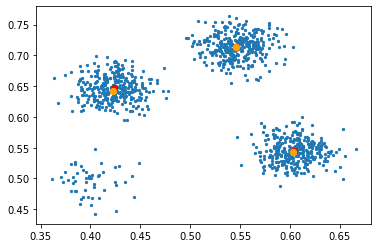

In [12]:
plt.scatter(X_full[:,0],X_full[:,1], s=5, )
plt.scatter(centers[:,0],centers[:,1], s=40, c='red')
plt.scatter(est_centers[:,0],est_centers[:,1], s=40, c='orange')

plt.show()

In [ ]:
def partition_matrix(X, centers, m):
    n_centers, dimension = centers.shape
    temp = np.transpose(
        np.array([dist(X, centers[i]) ** (2 / (m - 1)) for i in range(n_centers)])
    )
    mu = 1 / (np.sum(1 / temp, axis=1).reshape(-1, 1) * temp)
    return mu

In [16]:
partition_matrix(np.array([[0.4,0.5]]), centers, m=2)

array([[0.27429651, 0.54739442, 0.17830906]])